<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment5/Timeseries_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Absolutely, I'll guide you through the EDA process for the time series data of the "Indian Summer over the years" in manageable chunks.

# EDA on Timeseries Dataset

In this execution, we will do EDA Analysis on Timeseries Dataset:

The dataset we have used is : Indian Summer -  Over the years Dataset

Great! Let's restart and dive into the EDA process for the time series data of "Indian Summer over the years."

###  Introduction & Dataset Loading

#### 1. Introduction:
The first step in any EDA is understanding the dataset and the context it represents. We are looking at how summers in India have evolved over the years. This could involve metrics such as temperature, humidity, rainfall, etc., over a series of years. Time series data typically consists of observations made at consistent intervals over time.

#### 2. Dataset Loading:
Let's start by loading the dataset into a DataFrame.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:


from google.colab import files
uploaded = files.upload()

In [ ]:

# Load the dataset
df_summers = pd.read_csv("Indian Summers - Over the years.csv")

# Display the first few rows
df_summers.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.


### Chunk 2: Preliminary Data Inspection

#### 1. Data Inspection:
We'll start by inspecting:
- The total number of entries in the dataset.
- The time span covered by the dataset.
- Data types of each column.
- Presence of any missing values.


In [ ]:
# Check the shape of the dataset
num_entries, num_columns = df_summers.shape

# Determine the time span of the dataset
min_date = df_summers['Date'].min()
max_date = df_summers['Date'].max()

# Display data types of columns
data_types = df_summers.dtypes

# Check for missing values
missing_values = df_summers.isnull().sum()

num_entries, num_columns, min_date, max_date, data_types, missing_values


(13650,
 20,
 '2012-04-01',
 '2021-06-30',
 City                 object
 Date                 object
 tempmax             float64
 tempmin             float64
 temp                float64
 feelslikemax        float64
 feelslikemin        float64
 feelslike           float64
 dew                 float64
 humidity            float64
 windspeed           float64
 winddir             float64
 sealevelpressure    float64
 cloudcover          float64
 visibility          float64
 sunrise              object
 sunset               object
 moonphase           float64
 conditions           object
 description          object
 dtype: object,
 City                   0
 Date                   0
 tempmax               35
 tempmin               35
 temp                  45
 feelslikemax          36
 feelslikemin          36
 feelslike             46
 dew                   45
 humidity              45
 windspeed             45
 winddir               50
 sealevelpressure    3019
 cloudcover            


### Chunk 3: Handling Missing Values & Date Formatting

#### 1. Date Formatting:
For effective time series analysis, we need to ensure that our date column is in the correct datetime format.


#### 2. Handling Missing Values:
Given the nature of time series data and the significance of our dataset, we have a few options:
1. **Impute using forward-fill or backward-fill**: This involves filling a missing value with the previous value (forward-fill) or the next value (backward-fill). This method is often suitable for time series data.
2. **Interpolation**: This method can provide more nuanced imputations based on the trend of the data.
3. **Drop rows with missing values**: This might not be the best approach, especially if a significant amount of data is missing, but it's an option.


In [ ]:
# Convert the 'Date' column to datetime format
df_summers['Date'] = pd.to_datetime(df_summers['Date'])

# Check the data types again to confirm the conversion
date_data_type = df_summers['Date'].dtype

date_data_type


dtype('<M8[ns]')

In [ ]:
# Apply forward-fill to handle missing values
df_summers_filled = df_summers.fillna(method='ffill')

# Check if any missing values remain after forward-filling
remaining_missing_values = df_summers_filled.isnull().sum()

remaining_missing_values


City                0
Date                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
dtype: int64

In [ ]:
# Obtain summary statistics of the dataset
summary_statistics = df_summers_filled.describe()

summary_statistics


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
count,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,36.719487,25.837289,31.156403,40.193612,27.233150,33.703018,19.030007,54.573396,20.058022,205.134366,1003.494344,37.092264,4.664308,0.500692
std,4.118005,3.230387,3.076608,5.399033,4.912699,4.665183,5.984496,19.548350,9.881909,64.355199,5.355244,24.684662,1.380790,0.308204
min,0.000000,0.000000,19.900000,0.000000,0.000000,19.900000,-10.300000,7.410000,0.000000,0.000000,908.500000,0.000000,1.300000,0.000000
25%,34.000000,23.700000,29.200000,36.500000,23.700000,30.200000,15.000000,38.140000,14.800000,159.600000,1000.500000,16.700000,3.700000,0.250000
50%,37.000000,26.000000,31.100000,40.000000,26.000000,33.500000,20.300000,56.080000,19.400000,218.300000,1004.100000,36.700000,4.200000,0.500000
75%,39.800000,28.100000,33.200000,43.700000,31.100000,37.200000,24.000000,71.380000,24.100000,258.600000,1006.900000,53.900000,5.600000,0.760000
max,50.000000,37.000000,40.500000,79.200000,43.300000,48.500000,29.100000,99.040000,263.200000,360.000000,1026.200000,100.000000,12.300000,1.000000


### Chunk 6: Investigating Potential Outliers

#### 1. Investigating Outliers:
Outliers can be either genuine variations in the data or errors. In either case, it's crucial to identify and understand them as they can have a significant impact on our analyses.


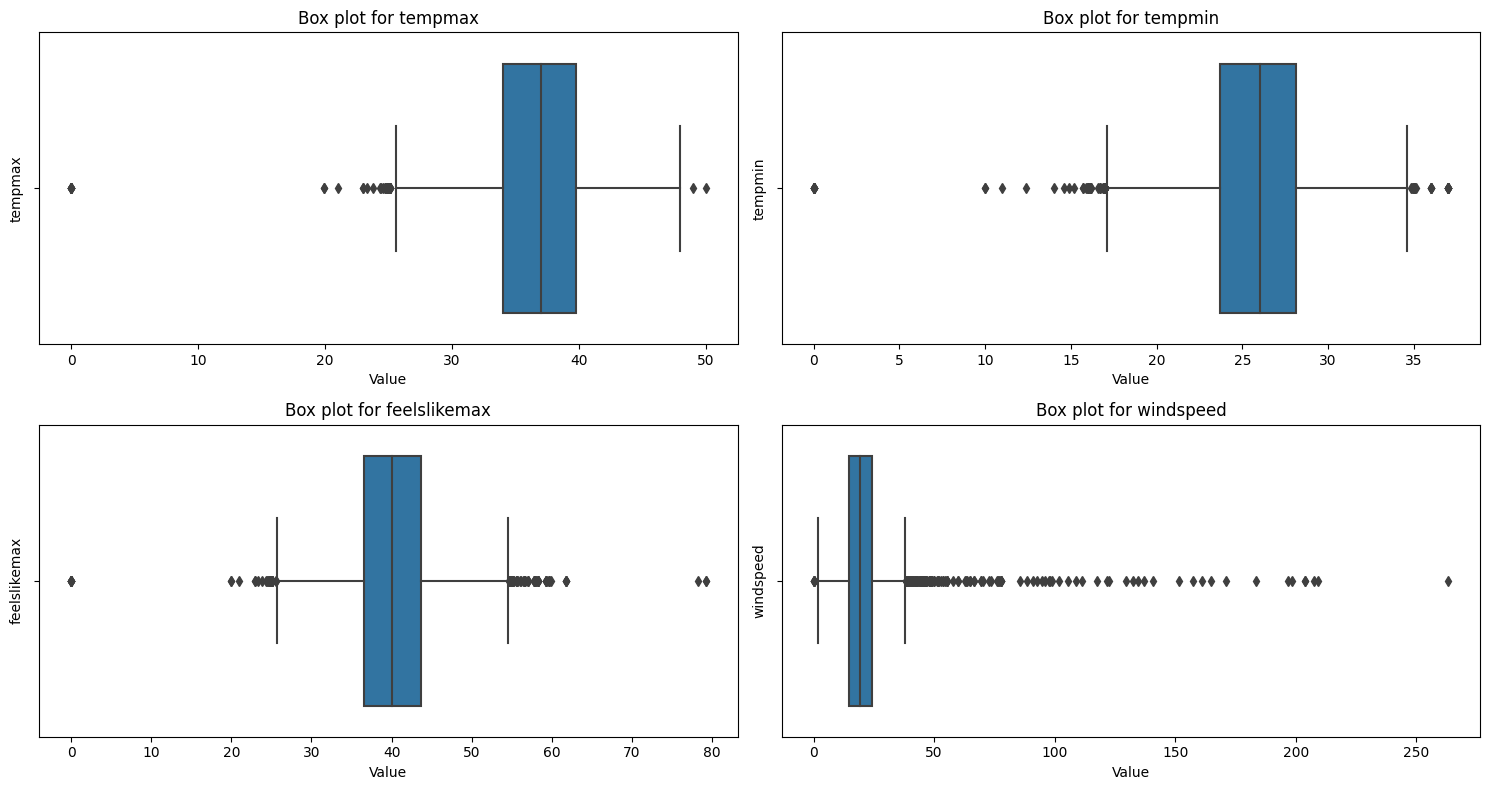

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to inspect for outliers
columns_to_inspect = ['tempmax', 'tempmin', 'feelslikemax', 'windspeed']

# Plotting box plots for each column
plt.figure(figsize=(15, 8))

for i, column in enumerate(columns_to_inspect, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_summers_filled[column])
    plt.title(f'Box plot for {column}')
    plt.ylabel(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


### Chunk 7: Addressing Outliers

#### 1. Addressing Outliers:
We can address outliers in a few ways:

1. **Removing them**: If we believe these outliers are errors or aren't representative of our dataset, we can remove them.
2. **Imputing with a representative value**: If we want to retain the data point but adjust the outlier, we can impute it with a median or mean value. The median is generally more robust to outliers.
3. **Investigating further**: If we suspect the outliers might be genuine data points (e.g., an exceptionally hot day), we could delve deeper into the specific dates or events that might explain these values.


In [ ]:
# Function to calculate the number of outliers and their bounds for each column
def outlier_bounds_and_counts(column):
    Q1 = df_summers_filled[column].quantile(0.25)
    Q3 = df_summers_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers_lower = df_summers_filled[df_summers_filled[column] < lower_bound].shape[0]
    num_outliers_upper = df_summers_filled[df_summers_filled[column] > upper_bound].shape[0]

    return lower_bound, upper_bound, num_outliers_lower + num_outliers_upper

# Calculate the outlier bounds and counts for the columns of interest
outliers_info = {column: outlier_bounds_and_counts(column) for column in columns_to_inspect}

outliers_info


{'tempmax': (25.300000000000004, 48.49999999999999, 43),
 'tempmin': (17.099999999999994, 34.7, 95),
 'feelslikemax': (25.699999999999996, 54.50000000000001, 112),
 'windspeed': (0.8499999999999996, 38.050000000000004, 205)}



### Chunk 8: Handling Outliers Based on Recommendations

#### 1. Handling Outliers for `tempmax` and `tempmin`:
We'll impute the outlier values in these columns with their respective median values.


In [ ]:
# Handling outliers for tempmax and tempmin by imputing with median
median_tempmax = df_summers_filled['tempmax'].median()
median_tempmin = df_summers_filled['tempmin'].median()

# Replace outliers with median values
df_summers_filled.loc[df_summers_filled['tempmax'] < outliers_info['tempmax'][0], 'tempmax'] = median_tempmax
df_summers_filled.loc[df_summers_filled['tempmin'] < outliers_info['tempmin'][0], 'tempmin'] = median_tempmin

# Investigate outliers for feelslikemax and windspeed
outliers_feelslikemax = df_summers_filled[df_summers_filled['feelslikemax'] > outliers_info['feelslikemax'][1]]
outliers_windspeed = df_summers_filled[df_summers_filled['windspeed'] > outliers_info['windspeed'][1]]

outliers_feelslikemax[['Date', 'City', 'feelslikemax', 'conditions', 'description']], outliers_windspeed[['Date', 'City', 'windspeed', 'conditions', 'description']]


(            Date     City  feelslikemax        conditions  \
 1090  2021-06-29  Lucknow          59.7  Partially cloudy   
 1091  2021-06-30  Lucknow          58.0  Partially cloudy   
 1363  2021-06-29   Kanpur          59.7  Partially cloudy   
 1364  2021-06-30   Kanpur          57.9  Partially cloudy   
 2411  2020-05-16  Kolkata          57.9  Partially cloudy   
 ...          ...      ...           ...               ...   
 13350 2012-06-04  Kolkata          55.1  Partially cloudy   
 13351 2012-06-05  Kolkata          55.2  Partially cloudy   
 13352 2012-06-06  Kolkata          56.6  Partially cloudy   
 13355 2012-06-09  Kolkata          55.2  Partially cloudy   
 13356 2012-06-10  Kolkata          55.2  Partially cloudy   
 
                              description  
 1090   Partly cloudy throughout the day.  
 1091   Partly cloudy throughout the day.  
 1363   Partly cloudy throughout the day.  
 1364   Partly cloudy throughout the day.  
 2411   Partly cloudy throughout t


###  Imputing Outliers for `feelslikemax` and `windspeed`


In [ ]:
# Calculate median values for feelslikemax and windspeed
median_feelslikemax = df_summers_filled['feelslikemax'].median()
median_windspeed = df_summers_filled['windspeed'].median()

# Replace outliers with median values
df_summers_filled.loc[df_summers_filled['feelslikemax'] > outliers_info['feelslikemax'][1], 'feelslikemax'] = median_feelslikemax
df_summers_filled.loc[df_summers_filled['windspeed'] > outliers_info['windspeed'][1], 'windspeed'] = median_windspeed

# Confirming the imputation by checking max values again
max_feelslikemax = df_summers_filled['feelslikemax'].max()
max_windspeed = df_summers_filled['windspeed'].max()

max_feelslikemax, max_windspeed


(54.5, 38.0)

### Time Series Visualizations

Visualizing time series data is crucial to understanding underlying trends, seasonality, and potential anomalies.

#### 1. Key Metrics Visualization:
We'll start by visualizing the following key metrics over time:
1. Average temperature (`temp`)
2. "Feels-like" temperature (`feelslike`)
3. Wind speed (`windspeed`)
4. Humidity (`humidity`)


<ipython-input-12-0447c520cc98>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sampled, x='Date', y='temp', ci=None)
<ipython-input-12-0447c520cc98>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sampled, x='Date', y='feelslike', ci=None)
<ipython-input-12-0447c520cc98>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sampled, x='Date', y='windspeed', ci=None)
<ipython-input-12-0447c520cc98>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sampled, x='Date', y='humidity', ci=None)


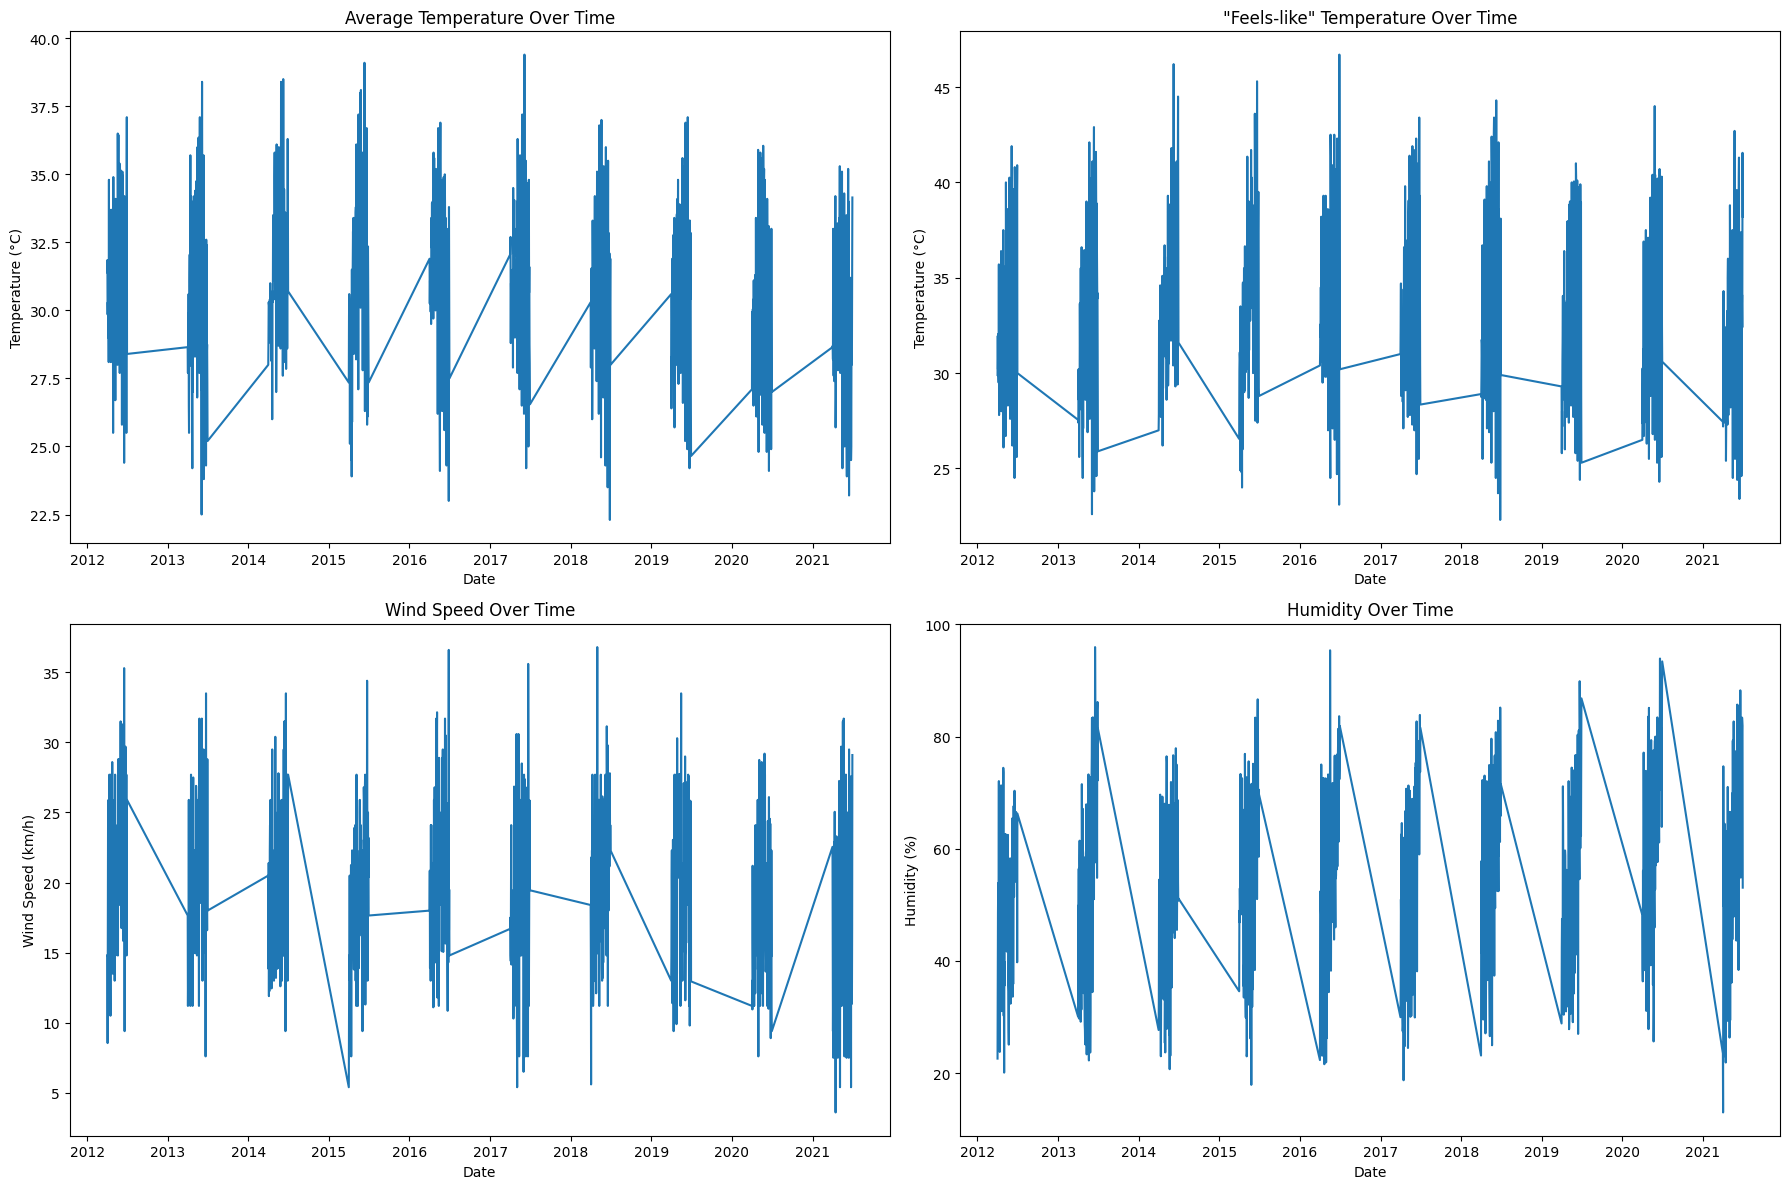

In [ ]:
# Sampling a representative subset of the dataset (every 10th row)
df_sampled = df_summers_filled.iloc[::10, :]

# Setting up the plotting parameters
plt.figure(figsize=(18, 12))

# Plotting average temperature over time
plt.subplot(2, 2, 1)
sns.lineplot(data=df_sampled, x='Date', y='temp', ci=None)
plt.title('Average Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')

# Plotting "feels-like" temperature over time
plt.subplot(2, 2, 2)
sns.lineplot(data=df_sampled, x='Date', y='feelslike', ci=None)
plt.title('"Feels-like" Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')

# Plotting wind speed over time
plt.subplot(2, 2, 3)
sns.lineplot(data=df_sampled, x='Date', y='windspeed', ci=None)
plt.title('Wind Speed Over Time')
plt.ylabel('Wind Speed (km/h)')
plt.xlabel('Date')

# Plotting humidity over time
plt.subplot(2, 2, 4)
sns.lineplot(data=df_sampled, x='Date', y='humidity', ci=None)
plt.title('Humidity Over Time')
plt.ylabel('Humidity (%)')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


<ipython-input-13-f57e2b971595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['Year'] = df_sampled['Date'].dt.year
<ipython-input-13-f57e2b971595>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['Month'] = df_sampled['Date'].dt.month
<ipython-input-13-f57e2b971595>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  monthly_pivot = monthly_avg.pivot("Month", "Year", metric)


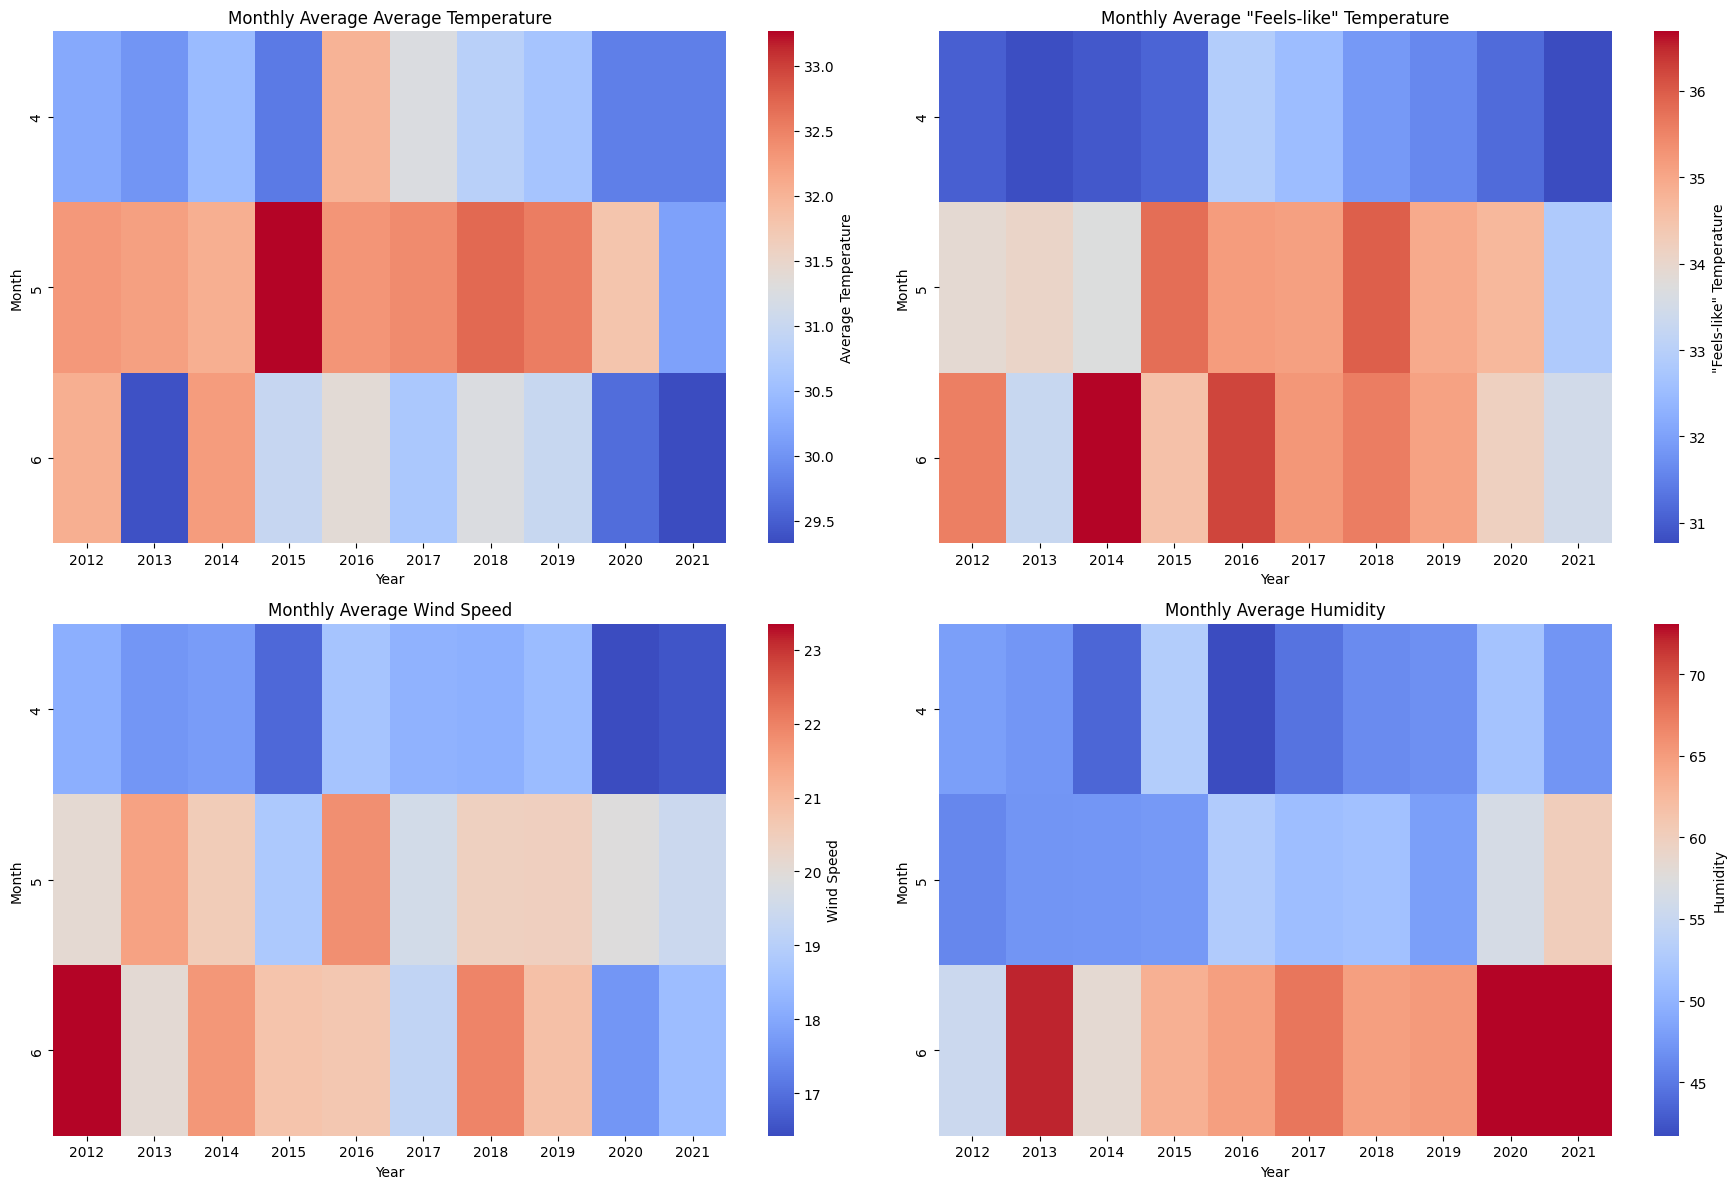

In [ ]:
# Extracting month and year from the Date column
df_sampled['Year'] = df_sampled['Date'].dt.year
df_sampled['Month'] = df_sampled['Date'].dt.month

# Calculating monthly averages for key metrics
monthly_avg = df_sampled.groupby(['Year', 'Month']).agg({'temp': 'mean', 'feelslike': 'mean', 'windspeed': 'mean', 'humidity': 'mean'}).reset_index()

# Plotting heatmaps for monthly averages
plt.figure(figsize=(18, 12))

metrics = ['temp', 'feelslike', 'windspeed', 'humidity']
titles = ['Average Temperature', '"Feels-like" Temperature', 'Wind Speed', 'Humidity']

for i, (metric, title) in enumerate(zip(metrics, titles), 1):
    plt.subplot(2, 2, i)
    monthly_pivot = monthly_avg.pivot("Month", "Year", metric)
    sns.heatmap(monthly_pivot, cmap='coolwarm', cbar_kws={'label': title})
    plt.title(f'Monthly Average {title}')
    plt.ylabel('Month')
    plt.xlabel('Year')

plt.tight_layout()
plt.show()


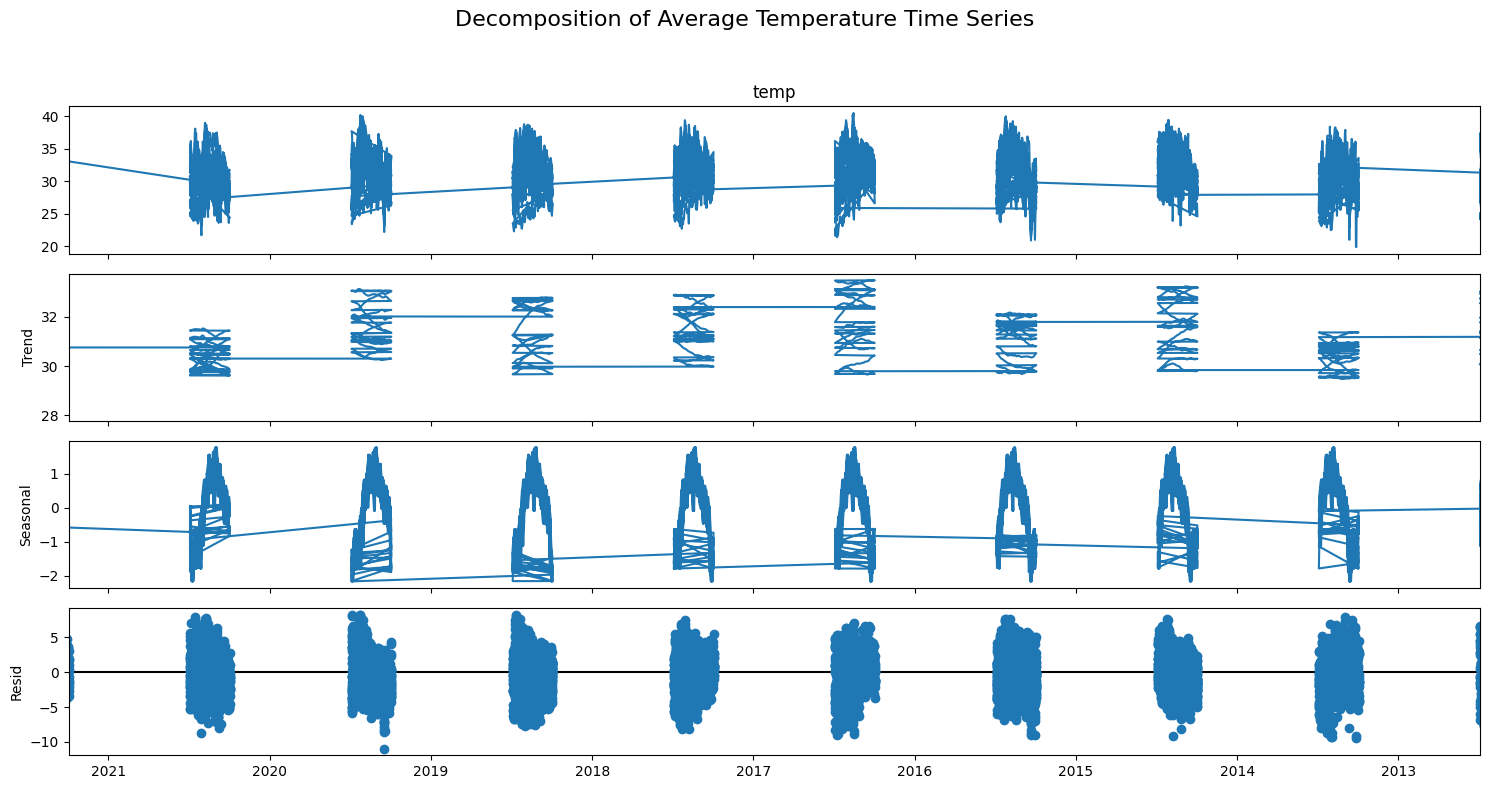

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the Date as index for decomposition
df_decompose = df_summers_filled.set_index('Date')


# Decomposing the 'temp' time series with the correct parameter
decomposition = seasonal_decompose(df_decompose['temp'], model='additive', period=365)

# Plotting the decomposition components
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.suptitle('Decomposition of Average Temperature Time Series', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# Extracting year, month, day, and day-of-week from the Date column
df_summers_filled['Year'] = df_summers_filled['Date'].dt.year
df_summers_filled['Month'] = df_summers_filled['Date'].dt.month
df_summers_filled['Day'] = df_summers_filled['Date'].dt.day
df_summers_filled['Day_of_Week'] = df_summers_filled['Date'].dt.dayofweek

# Creating lagged values for temp (previous day's temperature)
df_summers_filled['temp_lagged_1'] = df_summers_filled.groupby('City')['temp'].shift(1)

# Calculating 7-day rolling average for temp
df_summers_filled['temp_rolling_7'] = df_summers_filled.groupby('City')['temp'].rolling(window=7).mean().reset_index(0, drop=True)

# Displaying the first few rows of the dataset with the new features
df_summers_filled.head()


,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,moonphase,conditions,description,Year,Month,Day,Day_of_Week,temp_lagged_1,temp_rolling_7
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,...,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.,2021,4,1,3,NaN,NaN
1,New Delhi,2021-04-02,33.9,26.0,25.8,31.8,16.0,24.9,4.5,27.62,...,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.,2021,4,2,4,27.1,NaN
2,New Delhi,2021-04-03,34.8,26.0,26.0,32.2,14.6,25.1,1.3,23.18,...,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.,2021,4,3,5,25.8,NaN
3,New Delhi,2021-04-04,36.8,26.0,27.1,34.2,16.9,26.0,4.8,28.00,...,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.,2021,4,4,6,26.0,NaN
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,...,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.,2021,4,5,0,27.1,NaN



### Anomaly Detection using Isolation Forest

The Isolation Forest algorithm is particularly suitable for detecting anomalies in datasets with a large number of data points. It works by isolating observations and identifying the number of splits required to do so. Anomalies typically require fewer splits and can be isolated faster.


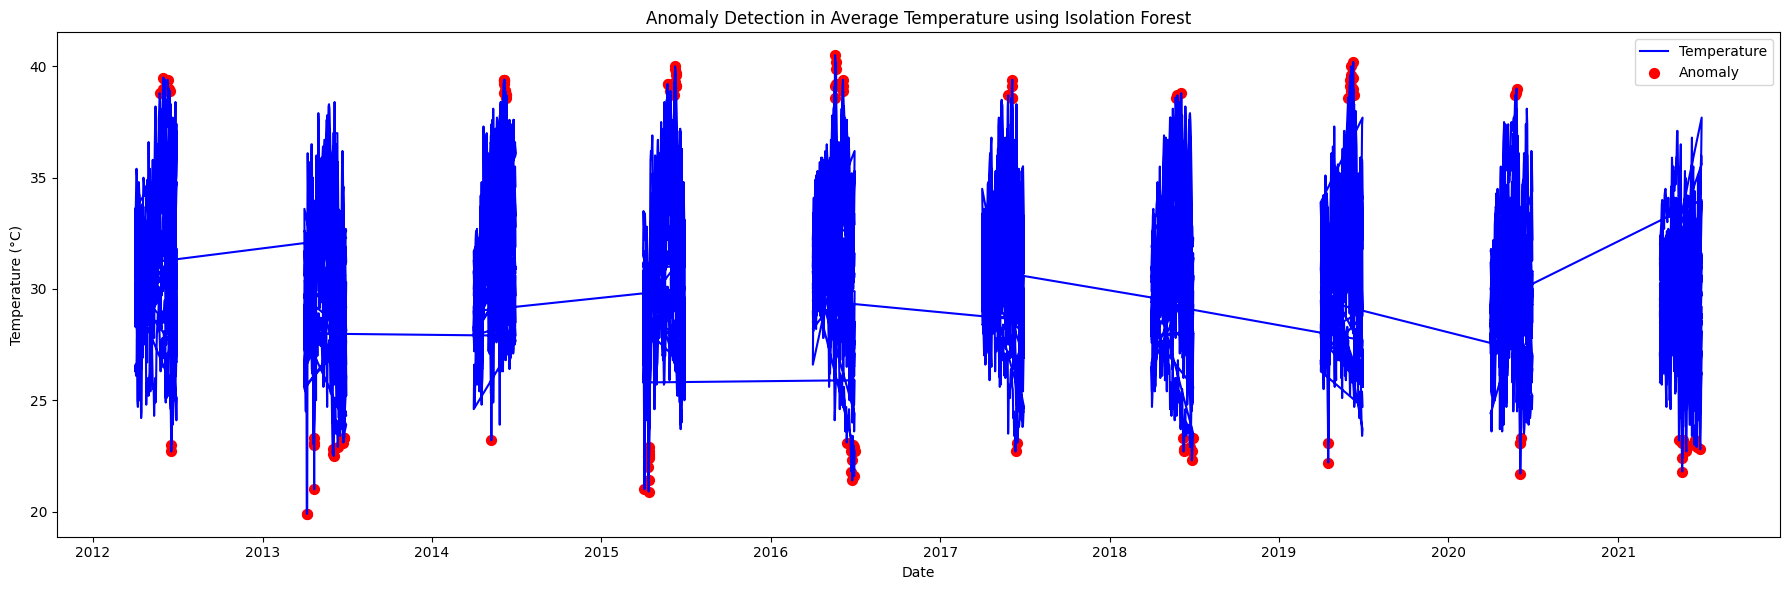

In [ ]:
from sklearn.ensemble import IsolationForest

# Reshaping the 'temp' column to fit the model requirements
X = df_summers_filled['temp'].values.reshape(-1, 1)

# Applying the Isolation Forest algorithm without the 'behaviour' parameter
iso_forest = IsolationForest(contamination=0.01)  # contamination parameter sets the percentage of outliers
anomalies = iso_forest.fit_predict(X)

# Adding the anomaly predictions to our dataframe
df_summers_filled['anomaly'] = anomalies

# Visualizing the anomalies on a time series plot
plt.figure(figsize=(18, 6))
plt.plot(df_summers_filled['Date'], df_summers_filled['temp'], label='Temperature', color='blue')
plt.scatter(df_summers_filled.loc[df_summers_filled['anomaly'] == -1, 'Date'],
            df_summers_filled.loc[df_summers_filled['anomaly'] == -1, 'temp'],
            color='red', label='Anomaly', s=50)
plt.title('Anomaly Detection in Average Temperature using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


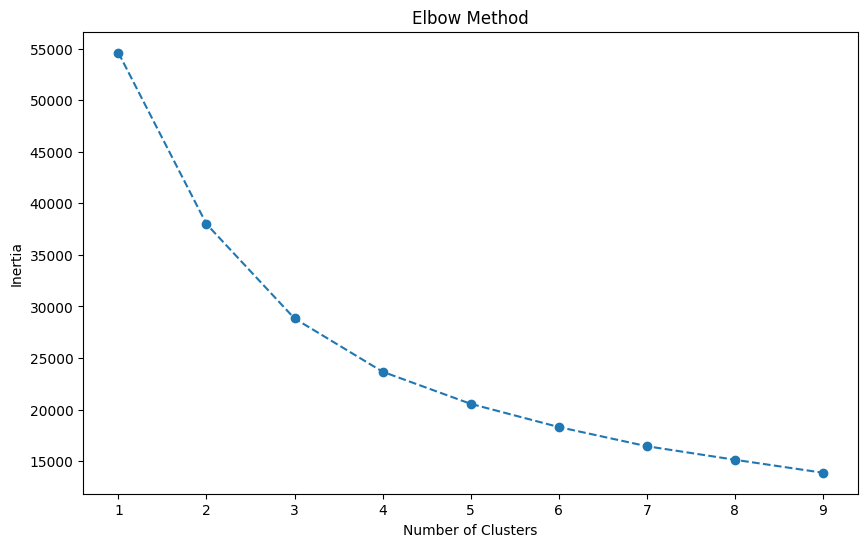

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = ['temp', 'humidity', 'windspeed', 'feelslike']
df_clustering = df_summers_filled[features]

# Normalizing the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clustering)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_values = range(1, 10)
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




###  Implementing Feature Engineering


In [ ]:
# Selecting and normalizing relevant features for clustering
features = ['temp', 'humidity', 'windspeed', 'feelslike']
df_clustering = df_summers_filled[features]
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clustering)

# Applying the KMeans clustering algorithm with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df_summers_filled['cluster'] = kmeans.fit_predict(df_normalized)

# Displaying the first few rows of the dataset with the cluster labels
df_summers_filled.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,conditions,description,Year,Month,Day,Day_of_Week,temp_lagged_1,temp_rolling_7,anomaly,cluster
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,...,Clear,Clear conditions throughout the day.,2021,4,1,3,NaN,NaN,1,0
1,New Delhi,2021-04-02,33.9,26.0,25.8,31.8,16.0,24.9,4.5,27.62,...,Clear,Clear conditions throughout the day.,2021,4,2,4,27.1,NaN,1,0
2,New Delhi,2021-04-03,34.8,26.0,26.0,32.2,14.6,25.1,1.3,23.18,...,Clear,Clear conditions throughout the day.,2021,4,3,5,25.8,NaN,1,0
3,New Delhi,2021-04-04,36.8,26.0,27.1,34.2,16.9,26.0,4.8,28.00,...,Clear,Clear conditions throughout the day.,2021,4,4,6,26.0,NaN,1,0
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,...,Partially cloudy,Partly cloudy throughout the day.,2021,4,5,0,27.1,NaN,1,1


### Clustering Using KMeans

The KMeans algorithm is one of the most popular clustering techniques. It partitions the dataset into 'K' clusters, where each observation belongs to the cluster with the nearest mean.


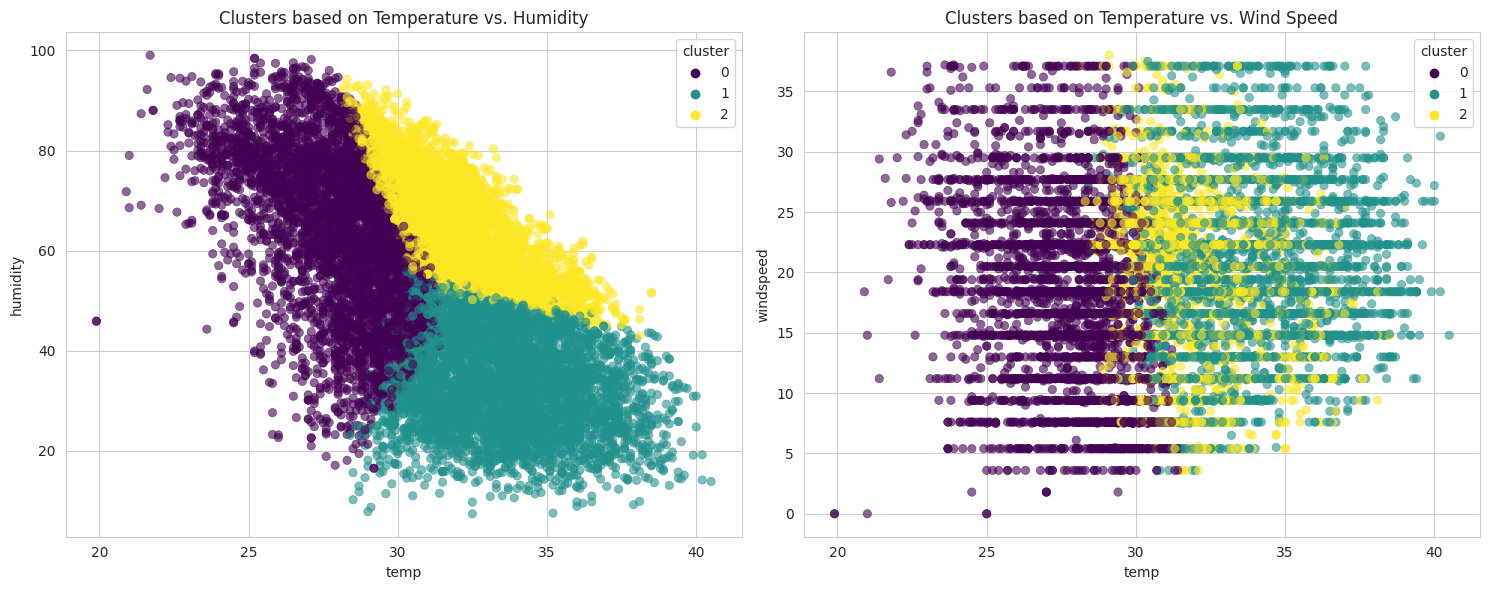

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

# Scatter plot for temp vs. humidity with clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='humidity', hue='cluster', data=df_summers_filled, palette='viridis', alpha=0.6, edgecolor=None)
plt.title('Clusters based on Temperature vs. Humidity')

# Scatter plot for temp vs. windspeed with clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='temp', y='windspeed', hue='cluster', data=df_summers_filled, palette='viridis', alpha=0.6, edgecolor=None)
plt.title('Clusters based on Temperature vs. Wind Speed')

plt.tight_layout()
plt.show()


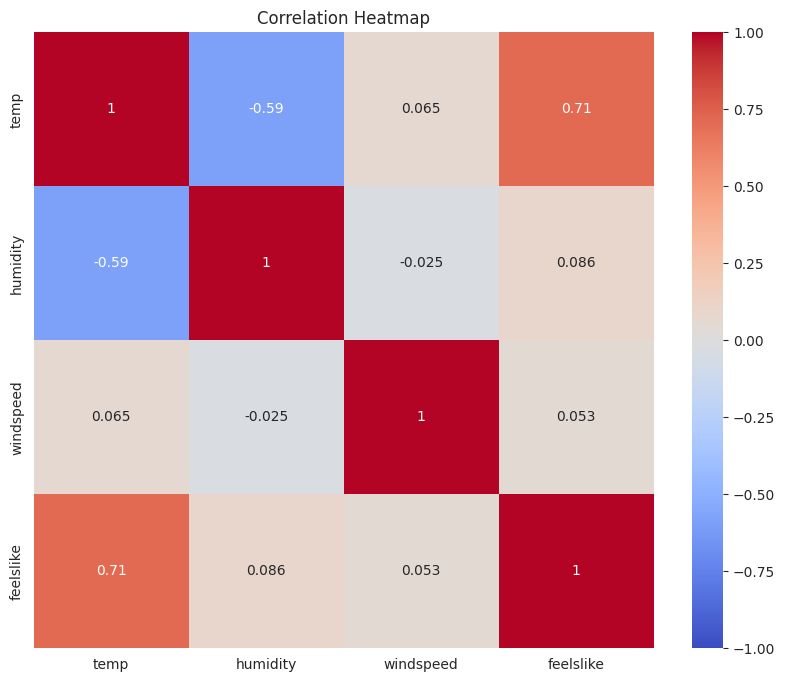

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df_summers_filled[features].corr()

# Visualizing the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()




### Chunk 25: Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. The benefits of feature selection include:
1. Reducing overfitting: Less redundant data means less opportunity to make decisions based on noise.
2. Improving accuracy: Less misleading data means modeling accuracy improves.
3. Reducing training time: Fewer data points reduce algorithm complexity and speed up the training process.



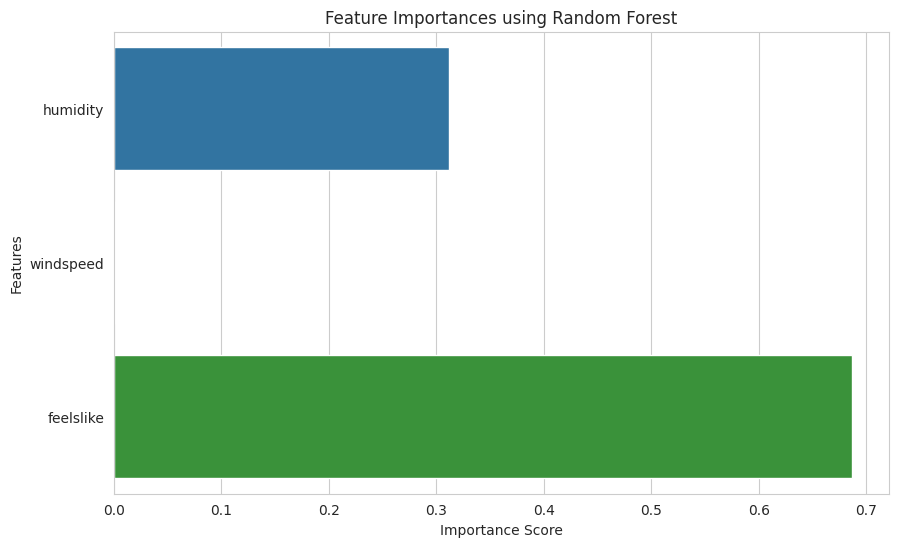

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separating the features and target variable
X = df_summers_filled[features].drop('temp', axis=1)
y = df_summers_filled['temp']

# Training a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X, y)

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances using Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.5923453702134307, 0.7976136741856329, 0.9341417611285807)

## AutoML with Auto-sklearn

In [ ]:
!pip install Cython==0.29.36
!pip uninstall scipy -y
!pip install scipy==1.9
!pip uninstall pyparsing -y
!pip install pyparsing==2.4
!pip uninstall scikit_learn -y


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.4
    Uninstalling Cython-3.0.4:
      Successfully uninstalled Cython-3.0.4
Found existing installation: scipy 1.11.3
Uninstalling scipy-1.11.3:
  Successfully uninstalled scipy-1.11.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 15.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


Found existing installation: pyparsing 3.1.1
Uninstalling pyparsing-3.1.1:
  Successfully uninstalled pyparsing-3.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; python_version > "3.0", but you have pyparsing 2.4.0 which is incompatible.


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip uninstall imbalanced-learn -y
!pip uninstall mlxtend -y
!pip uninstall yellowbrick -y

Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Successfully uninstalled yellowbrick-1.5


In [ ]:
!pip install scikit-learn==0.24.2 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22231959 sha256=c571651114cfa5e60a42a17ea8b877cdd47f04cbebd996d9957e53a50601de0b
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.7 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=71a2e9568ad47311a32e7e7d8db41b28cd9ddc75607d31ecdf08a32800a9e81d
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl

In [ ]:
!pip uninstall scipy -y
!pip install scipy==1.9

Found existing installation: scipy 1.9.0
Uninstalling scipy-1.9.0:
  Successfully uninstalled scipy-1.9.0
  Using cached scipy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
!pip uninstall pyparsing -y
!pip install pyparsing==2.4

Found existing installation: pyparsing 2.4.0
Uninstalling pyparsing-2.4.0:
  Successfully uninstalled pyparsing-2.4.0
  Using cached pyparsing-2.4.0-py2.py3-none-any.whl (62 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; python_version > "3.0", but you have pyparsing 2.4.0 which is incompatible.


In [ ]:
!pip uninstall scikit_learn -y
!pip install scikit-learn==0.24.2 --no-build-isolation


Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
import autosklearn.regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=1200,  # in seconds
    per_run_time_limit=300,  # max time for each model

)
automl.fit(X_train, y_train)


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=300, time_left_for_this_task=1200)

In [ ]:
y_pred = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MAE: 0.14
RMSE: 0.19
R^2: 1.00


In [ ]:
print(automl.show_models())


{5: {'model_id': 5, 'rank': 1, 'cost': 0.010524762054963666, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x782c430a4b80>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x782c3fff0f40>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x782c3fff21d0>, 'sklearn_regressor': KNeighborsRegressor(n_neighbors=2, weights='distance')}, 7: {'model_id': 7, 'rank': 2, 'cost': 0.004443555937156507, 'ensemble_weight': 0.14, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x782c42d2c100>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x782c3fff3340>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x782c3fff0280>, 'sklearn_regressor': HistGradientBoosting

In [ ]:
automl.show_models()

{5: {'model_id': 5,
  'rank': 1,
  'cost': 0.010524762054963666,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x782c430a4b80>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x782c3fff0f40>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x782c3fff21d0>,
  'sklearn_regressor': KNeighborsRegressor(n_neighbors=2, weights='distance')},
 7: {'model_id': 7,
  'rank': 2,
  'cost': 0.004443555937156507,
  'ensemble_weight': 0.14,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x782c42d2c100>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x782c3fff3340>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x782c3fff0280>,
  'sklearn_regressor': HistGradientBoostingRegressor(l2_